In [27]:
import numpy as np
import matplotlib.pyplot as plt
# dimensiones de la placa
Lx = 10; Ly = 10
dx = 1; dy = dx
x = np.arange(0,Lx+dx,dx)
y = np.arange(0,Ly+dy,dy)

T = np.zeros([np.size(y),np.size(x)])+1e-4
dTdx = np.zeros([np.size(y),np.size(x)])
dTdy = np.zeros([np.size(y),np.size(x)])
Tviejo = np.zeros([np.size(y),np.size(x)])
# Condiciones de frontera de Dirichlet
T[-1]=100
T[:,-1] = 75

# condiciones de neumann
k = 0.5
qx0 = 0
qy0 = -1
dTdx[:,0]=-qx0/k
dTdy[0,:]=-qy0/k

In [28]:
error = 1
while (error > 0.01):
    Tviejo[:][:] = T[:][:]
    for j in np.arange(0,y.size-1):
        for i in np.arange(0,x.size-1):
            if i == 0 & j == 0:
                T[j][i]= (2*T[j][i+1]-2*dx*dTdx[j][i]+2*T[j+1][i]-2*dy*dTdy[j][i])/4
            elif i==0 & j !=0:
                T[j][i]= (2*T[j][i+1]-2*dx*dTdx[j][i]+T[j+1][i]+T[j-1][i])/4
            elif i!=0 & j == 0:
                T[j][i]= (T[j][i+1]+T[j][i-1]+2*T[j+1][i]-2*dy*dTdy[j][i])/4
            else:
                T[j][i]= (T[j][i+1]+T[j][i-1]+T[j+1][i]+T[j-1][i])/4
    
    E = np.abs((T-Tviejo)/T)
    error = E.max()


In [29]:
T

array([[ 96.93565497,  97.15481993,  97.16175212,  96.90601288,
         96.26191455,  95.02643855,  92.93653176,  89.73467961,
         85.31544382,  79.98961425,  75.        ],
       [ 99.65909565,  99.69107849,  99.59298769,  99.30185365,
         98.68617444,  97.530125  ,  95.5340616 ,  92.36322602,
         87.77626158,  81.82277788,  75.        ],
       [ 99.87573938,  99.86028947,  99.75803624,  99.50761522,
         98.98257924,  97.96491912,  96.12908715,  93.07476488,
         88.46076906,  82.25761146,  75.        ],
       [ 99.94277097,  99.92360064,  99.84452389,  99.65238261,
         99.23316222,  98.3762982 ,  96.73946282,  93.85509276,
         89.25551763,  82.78486029,  75.        ],
       [ 99.97027777,  99.95652949,  99.90281908,  99.76693117,
         99.45253482,  98.76656648,  97.36336357,  94.71275083,
         90.19107679,  83.44196379,  75.        ],
       [ 99.98506083,  99.97685354,  99.94410183,  99.85629149,
         99.63837624,  99.12521105,  97.9

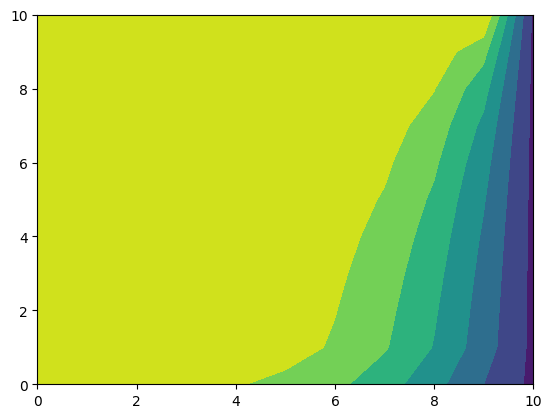

In [30]:
X, Y = np.meshgrid(x,y)
plt.contourf(X,Y,T)